## Packages Import

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Model Learning
from sklearn import model_selection
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report

# Standard Libraries
import math, time, datetime
from collections import Counter

# Managaing Warnings
import warnings
warnings.filterwarnings('ignore')

## Get the dataset

In [2]:
train = pd.read_csv('./datasets/train.csv')

In [3]:
test = pd.read_csv('./datasets/test.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data Exploration

In [6]:
# Describing Numerical Features
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# Describing Categorical Features
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Taussig, Miss. Ruth",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# test dataframe won't include Survived
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Full dataset
df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


## Outlier Detection

In [12]:
def plot_boxplot(df, features, cols=2, width=20, height=15, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(feature)
        g = sns.boxplot(df[feature])
        plt.xticks(rotation=25)

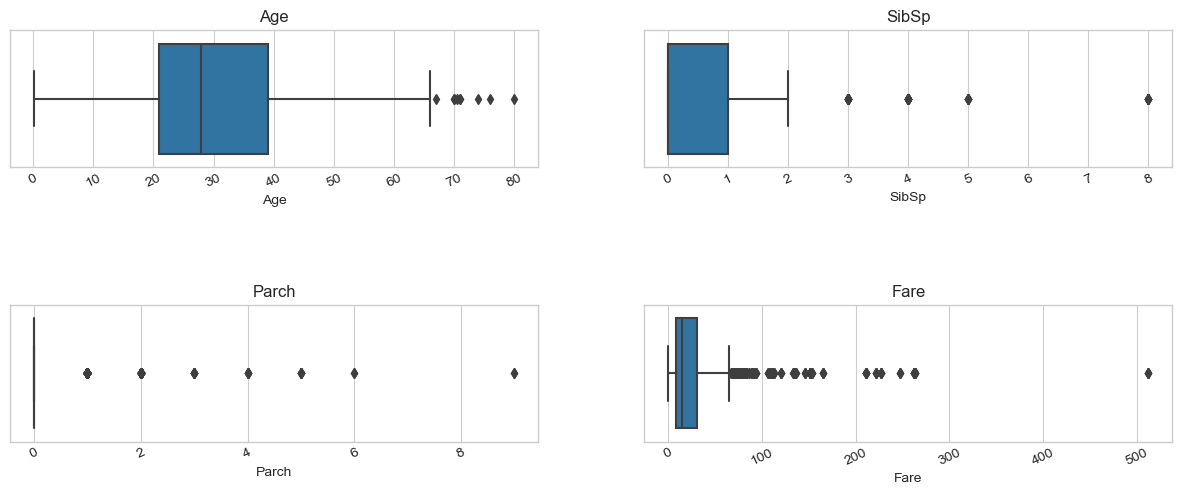

In [13]:
# Visualize numerical features to detect outliers
plot_boxplot(df, ['Age', 'SibSp', 'Parch', 'Fare'], width=15, height=20, hspace=1, wspace=0.2)

In [14]:
def detect_outliers(df,features,n):
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than n outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outlier_indices = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outlier_indices 

In [15]:
# detect outliers from Age, SibSp , Parch and Fare. 
# Considered outliers as rows that have at least two outlied numerical values.
Outlier_indices_to_drop = detect_outliers(df,["Age","SibSp","Parch","Fare"], 2)

In [16]:
df.iloc[Outlier_indices_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Seem like we have no outlier to drop, some passenger paid way too expensive fare but we decided to keep it.

In [17]:
df.loc[df['Fare'] > 500, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [18]:
# Full dataset
df = pd.concat([train, test], axis=0).reset_index(drop=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


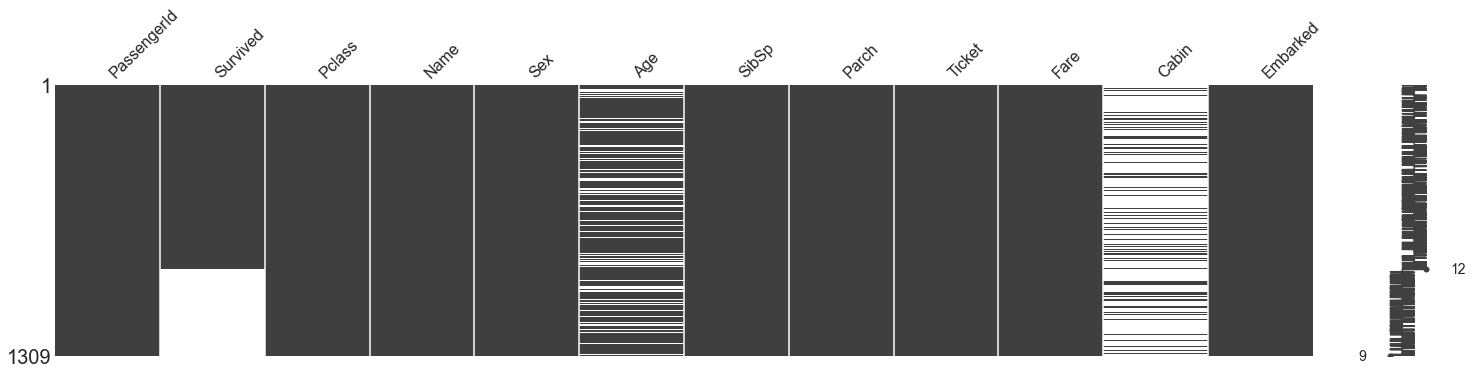

In [20]:
# Visualise the missing values
missingno.matrix(df, figsize=(25, 5));

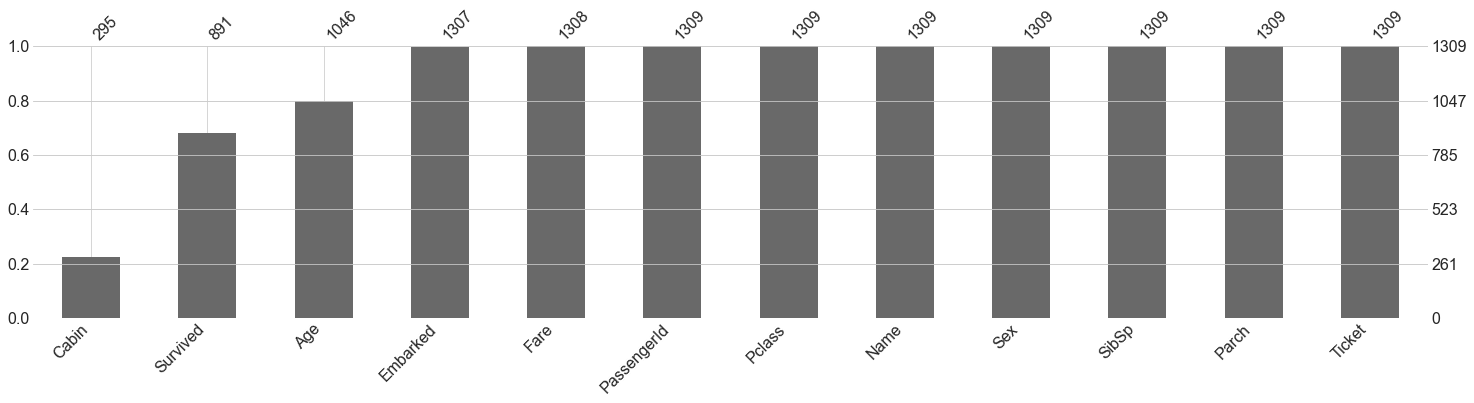

In [21]:
missingno.bar(df, sort='ascending', figsize=(25, 5));

In [22]:
# Check missing values
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
# Missing Percentage
(df.isnull().sum()/df.isnull().replace([False],[True]).sum()) * 100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

Age and Cabin features have an important part of missing values.

Survived missing values correspond to the join testing dataset (Survived column doesn't exist in test set)

In [24]:
# Plot the distribution of each feature
def plot_distribution(df, cols=5, width=20, height=15, hspace=0.4, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, col in enumerate(df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(col)
        if df.dtypes[col] == np.object:
            # Use countplot for categorical feature
            g = sns.countplot(y=col, data=df)
            # Shorten the feature name
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            # Use distribution for numerical feature
            g = sns.distplot(df[col])
            plt.xticks(rotation=25)

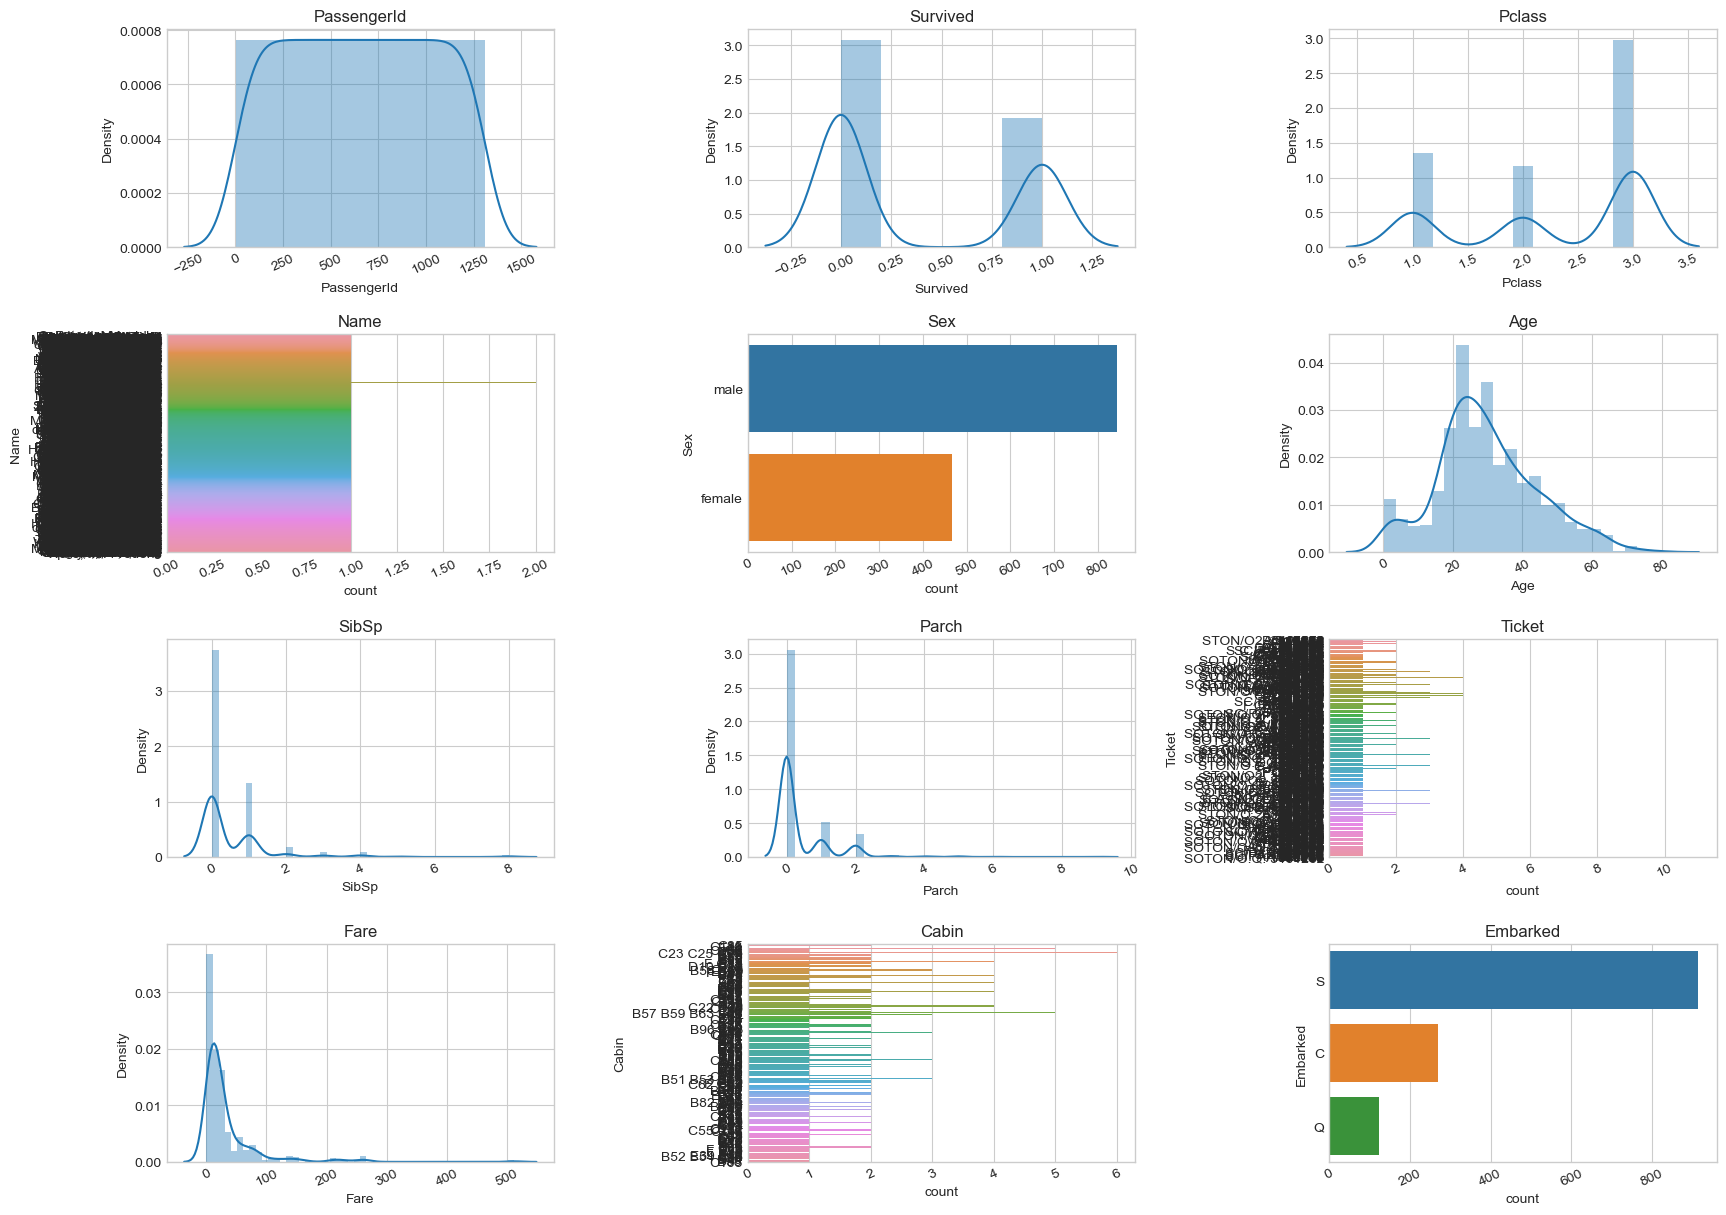

In [25]:
plot_distribution(df, cols=3)

## Univariate Analysis

In [26]:
# Create dataframe for perfom data analysis.
df_bin = pd.DataFrame() # Discretised continuous variables
df_con = pd.DataFrame() # continuous variables

### Feature Survived

This is the feature we are trying to predict.

+ 0 = No
+ 1 = Yes

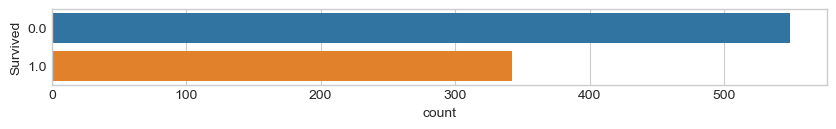

In [27]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Survived',data=df);

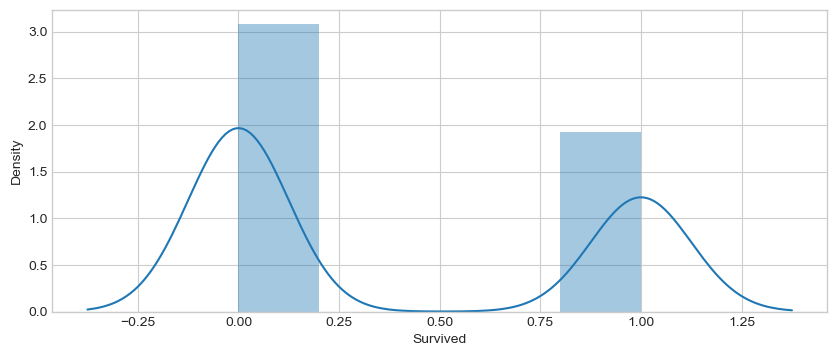

In [28]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Survived']);

In [29]:
df_bin['Survived'] = df['Survived']
df_con['Survived'] = df['Survived']

### Feature PassengerId

Unique Id for each passenger

In [30]:
df[['PassengerId']].corrwith(df['Survived'])

PassengerId   -0.005007
dtype: float64

**Note:** PassengerId is just a unique id number for each passenger since it's no relate to our target (Survived feature), we won't move forward using this variable.

### Feature Pclass

A proxy for socio-economic status (SES)

+ 1st = Upper
+ 2nd = Middle
+ 3rd = Lower

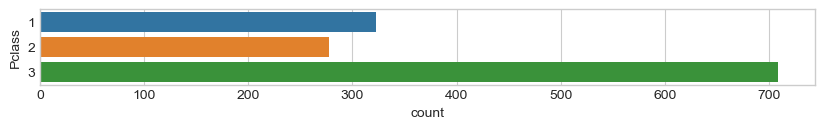

In [31]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Pclass',data=df);

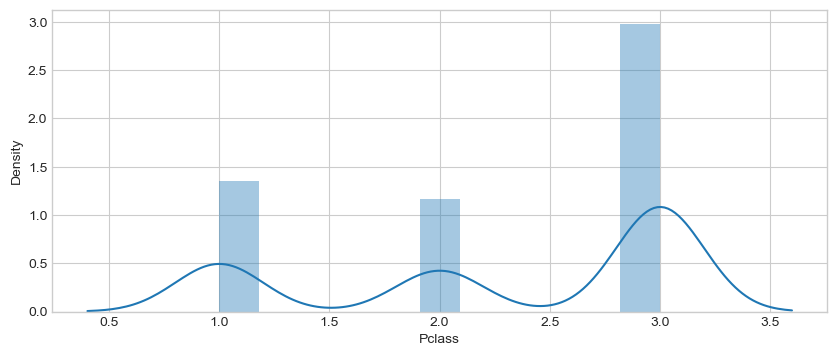

In [32]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Pclass']);

In [33]:
df['Pclass'].describe()

count    1309.000000
mean        2.294882
std         0.837836
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         3.000000
Name: Pclass, dtype: float64

In [34]:
df_bin['Pclass'] = df['Pclass']
df_con['Pclass'] = df['Pclass']

### Feature Name

The name of the passenger

In [35]:
df['Name'].value_counts()

Connolly, Miss. Kate                      2
Kelly, Mr. James                          2
Taussig, Miss. Ruth                       1
Rintamaki, Mr. Matti                      1
Kvillner, Mr. Johan Henrik Johannesson    1
                                         ..
de Brito, Mr. Jose Joaquim                1
Doyle, Miss. Elizabeth                    1
Newell, Miss. Madeleine                   1
Peter, Master. Michael J                  1
Garside, Miss. Ethel                      1
Name: Name, Length: 1307, dtype: int64

In [36]:
df['Name'].describe()

count                     1309
unique                    1307
top       Connolly, Miss. Kate
freq                         2
Name: Name, dtype: object

Each name is unique for each passenger just like the PassengerId. 

However, the title might be useful information, we will deal with it later.

### Feature Sex

The gender of the passenger

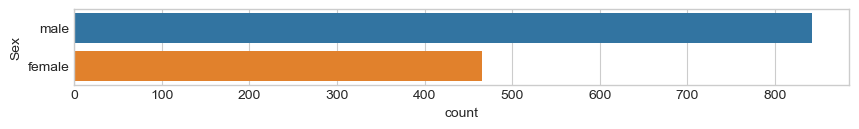

In [37]:
plt.figure(figsize=(10, 1), dpi=100)
sns.countplot(y='Sex', data=df);

In [38]:
df['Sex'].describe()

count     1309
unique       2
top       male
freq       843
Name: Sex, dtype: object

In [39]:
df_bin['Sex'] = df['Sex']
df_con['Sex'] = df['Sex']

### Feature SibSp

the number of siblings / spouses aboard the Titanic

sibsp: The dataset defines family relations in this way...

+ Sibling = brother, sister, stepbrother, stepsister
+ Spouse = husband, wife (mistresses and fiancés were ignored)

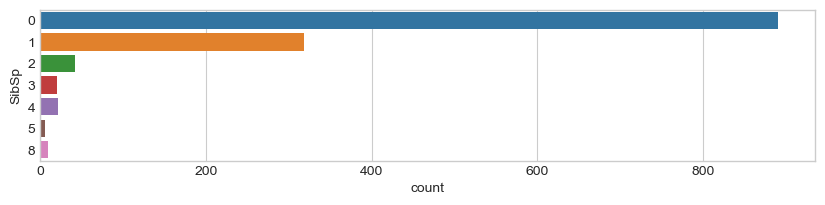

In [40]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='SibSp',data=df);

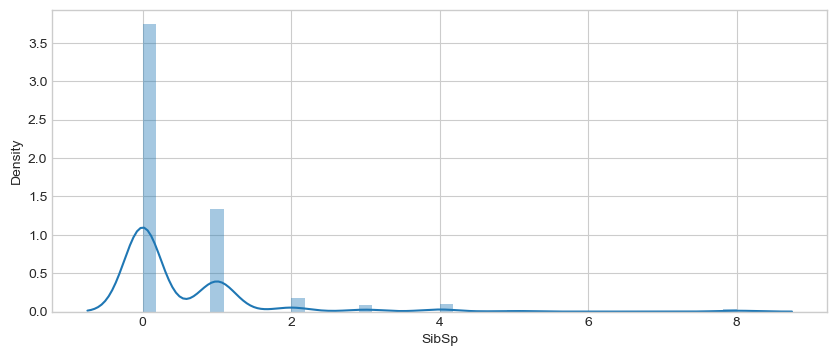

In [41]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['SibSp']);

In [42]:
df[['SibSp']].describe()

,SibSp
count,1309.000000
mean,0.498854
std,1.041658
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


In [43]:
df[['SibSp']].corrwith(df['Survived'])

SibSp   -0.035322
dtype: float64

In [44]:
df_bin['SibSp'] = df['SibSp']
df_con['SibSp'] = df['SibSp']

### Feature Parch

the number of parents / children aboard the Titanic

parch: The dataset defines family relations in this way...

+ Parent = mother, father
+ Child = daughter, son, stepdaughter, stepson
+ Some children travelled only with a nanny, therefore parch=0 for them.

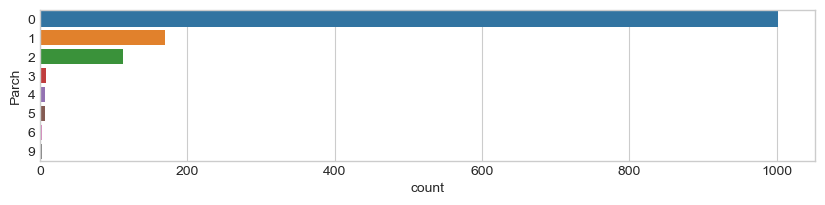

In [45]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='Parch',data=df);

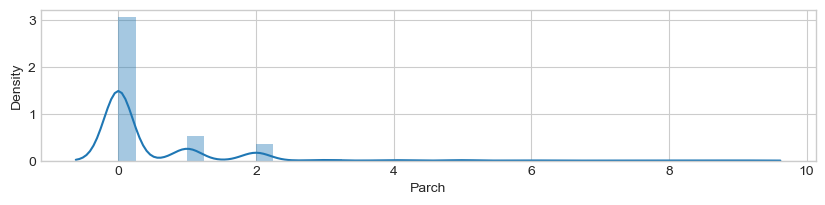

In [46]:
plt.figure(figsize=(10, 2), dpi=100)
sns.distplot(df['Parch']);

In [47]:
df['Parch'].describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [48]:
df[['Parch']].corrwith(df['Survived'])

Parch    0.081629
dtype: float64

In [49]:
df_bin['Parch'] = df['Parch']
df_con['Parch'] = df['Parch']

### Feature Ticket

Ticket number of each passenger

In [50]:
df['Ticket'].value_counts()

CA. 2343        11
CA 2144          8
1601             8
3101295          7
S.O.C. 14879     7
                ..
112053           1
C 7075           1
2688             1
368364           1
315154           1
Name: Ticket, Length: 929, dtype: int64

In [51]:
len(df['Ticket'].unique())

929

In [52]:
# Duplication Percentage
df['Ticket'].duplicated().sum()/len(df['Ticket']) * 100

29.02979373567609

**Note:** Since ticket has 29% of duplication and there may not be a correlation between Ticket and survival, we won't move forward using this variable.

### Feature Fare

Passenger fare

In [53]:
# Check missing values
df['Fare'].isnull().sum()

1

In [54]:
# Check missing values
(df['Fare'].isnull().sum()/len(df['Fare'])) * 100

0.07639419404125286

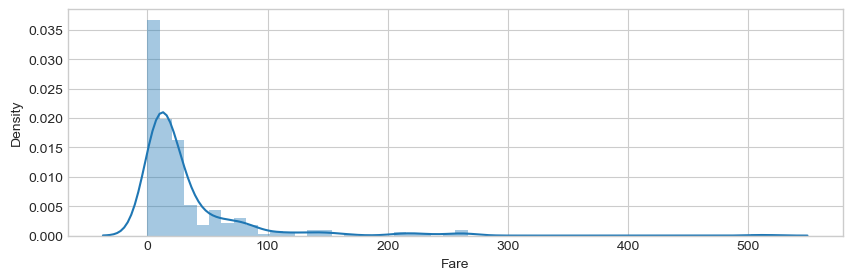

In [55]:
plt.figure(figsize=(10, 3), dpi=100)
sns.distplot(df['Fare']);

In [56]:
df['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [57]:
df[['Fare']].corrwith(df['Survived'])

Fare    0.257307
dtype: float64

In [58]:
# Discretize the values
df_bin['Fare'] = pd.cut(df['Fare'], 4)

In [59]:
df_bin['Fare'].value_counts()

(-0.512, 128.082]     1241
(128.082, 256.165]      50
(256.165, 384.247]      13
(384.247, 512.329]       4
Name: Fare, dtype: int64

In [60]:
df_con['Fare'] = df['Fare']

### Feature Cabin

The carbin number

In [61]:
# Check missing values
df['Cabin'].isnull().sum()

1014

In [62]:
# Missing Percentage
(df['Cabin'].isnull().sum()/len(df)) * 100

77.46371275783041

In [63]:
df['Cabin'].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
D                  4
C78                4
                  ..
A36                1
C51                1
A11                1
F E57              1
C103               1
Name: Cabin, Length: 186, dtype: int64

**Note:** Since there are too many missing values, we won't move forward using this variable.

### Feature Age

Age of each passenger in years

In [64]:
# Check missing values
df['Age'].isnull().sum()

263

In [65]:
# Missing Percentage
(df['Age'].isnull().sum()/len(df)) * 100

20.091673032849503

**Note:** We will deal with missing values after the univariate analysis

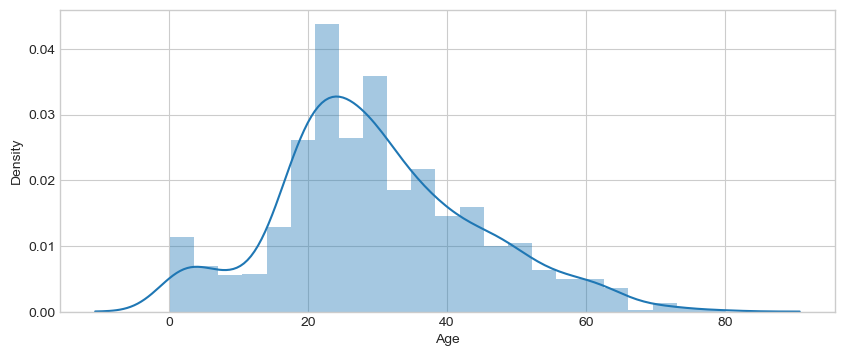

In [66]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Age']);

In [67]:
df['Age'].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

**Note:** We will add this variable to the sub dataframe after deal with missing values

### Feature Embarked

Port of Embarkation of each passenger

+ C = Cherbourg
+ Q = Queenstown
+ S = Southampton

In [68]:
# Check missing values
df['Embarked'].isnull().sum()

2

In [69]:
# Missing Percentage
(df['Embarked'].isnull().sum()/len(df)) * 100

0.15278838808250572

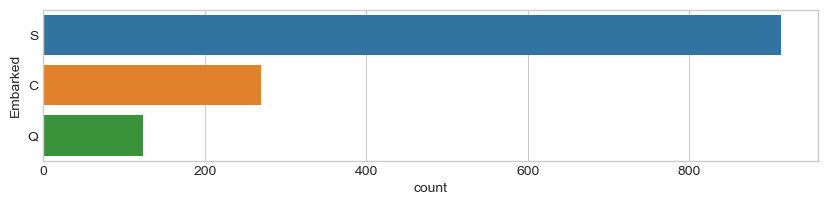

In [70]:
plt.figure(figsize=(10, 2), dpi=100)
sns.countplot(y='Embarked',data=df);

In [71]:
df[['Embarked']].describe()

,Embarked
count,1307
unique,3
top,S
freq,914


**Note:** We will add this variable to the sub dataframe after deal with missing values

## Filling missing values

There are 3 features that have missing values.

+ Age
+ Fare
+ Embarked
+ Cabin ( Since 77% missing way too much so we will discard this feature )

### Age

Age contains 263 missing values in the whole dataset

We decided to keep the age feature and to impute the missing values.

In [72]:
# temporary convert Sex into categorical for visualization
df["Sex"] = df["Sex"].map({"male": 0, "female":1})

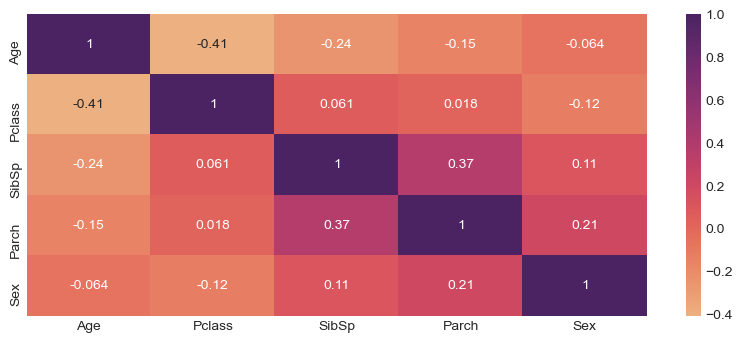

In [73]:
plt.figure(figsize=(10, 4), dpi=100)
sns.heatmap(df[["Age","Pclass","SibSp","Parch","Sex"]].corr(),cmap="flare",annot=True);

In [74]:
df.corrwith(df['Age'])

PassengerId    0.028814
Survived      -0.077221
Pclass        -0.408106
Sex           -0.063645
Age            1.000000
SibSp         -0.243699
Parch         -0.150917
Fare           0.178740
dtype: float64

In [75]:
# Convert back into the string object and we will encode it later
df["Sex"] = df["Sex"].map({0: 'male', 1: 'female'})

Since Pclass, SibSp and Parch are the most correlated features with Age, We decided to impute with theses variable

In [76]:
index_nan = df["Age"][df["Age"].isnull()].index

for i in index_nan:
    age_med = df["Age"].median()
    age_pred = df["Age"][((df['Pclass'] == df.loc[i, "Pclass"]) & 
                          (df['Parch'] == df.loc[i, "Parch"]) & 
                          (df['Pclass'] == df.loc[i, "Pclass"]))].median()
    if not np.isnan(age_pred) :
        df['Age'].loc[i] = age_pred
    else :
        df['Age'].loc[i] = age_med

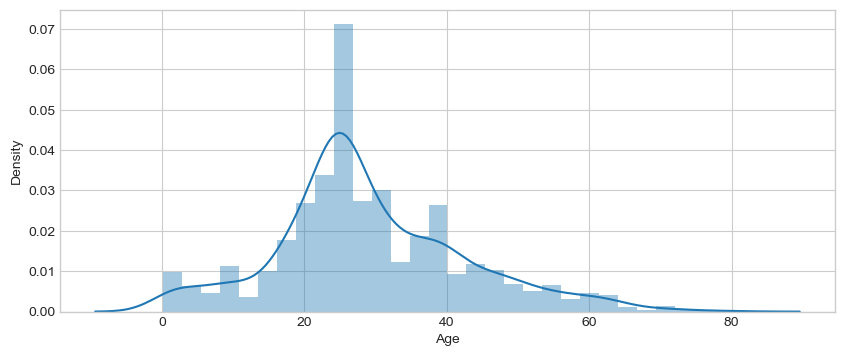

In [77]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Age']);

### Fare

Fare contains 1 missing value 

In [78]:
df[df['Fare'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


We will impute with the median of the fare in the same Pclass

In [79]:
fare_pclass3_med = df['Fare'][df['Pclass'] == 3].median()

In [80]:
fare_pclass3_med

8.05

In [81]:
df.loc[1033, 'Fare'] = fare_pclass3_med

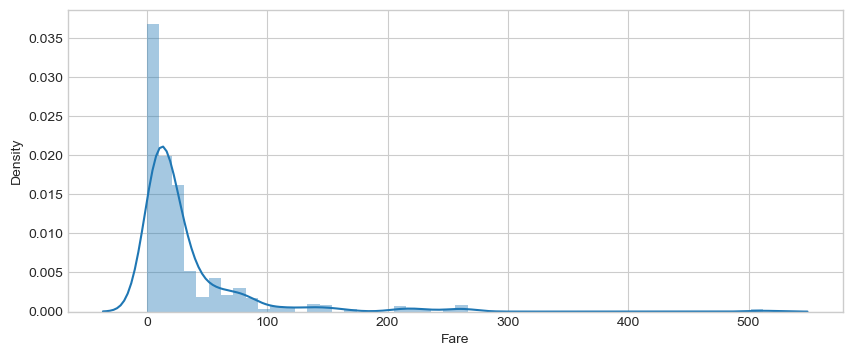

In [82]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Fare']);

### Feature Embarked

Embarked contains 2 missing values

We will imputed with the most frequency value

In [83]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [84]:
# S is the most frequency
most_frequency = df['Embarked'].mode().values[0]
most_frequency

'S'

In [85]:
df['Embarked'].fillna(most_frequency, inplace=True)

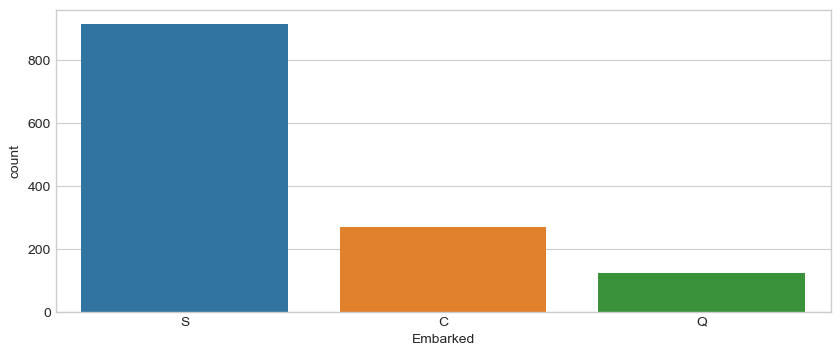

In [86]:
# Visualize after imputation
plt.figure(figsize=(10, 4), dpi=100)
sns.countplot(df['Embarked']);

Add the imputed features to the sub dataframe

In [87]:
df_bin['Age'] = pd.cut(df['Age'], 10)
df_con['Age'] = df['Age']

df_bin['Fare'] = pd.cut(df['Fare'], 5)
df_con['Fare'] = df['Fare']

df_bin['Embarked'] = df['Embarked']
df_con['Embarked'] = df['Embarked']

Sub dataframe after imputed missing values and deleted outliers will looke like this

In [88]:
df_bin.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0.0,3,male,1,0,"(-0.512, 102.466]","(16.136, 24.119]",S
1,1.0,1,female,1,0,"(-0.512, 102.466]","(32.102, 40.085]",C
2,1.0,3,female,0,0,"(-0.512, 102.466]","(24.119, 32.102]",S
3,1.0,1,female,1,0,"(-0.512, 102.466]","(32.102, 40.085]",S
4,0.0,3,male,0,0,"(-0.512, 102.466]","(32.102, 40.085]",S


In [89]:
df_con.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked
0,0.0,3,male,1,0,7.2500,22.0,S
1,1.0,1,female,1,0,71.2833,38.0,C
2,1.0,3,female,0,0,7.9250,26.0,S
3,1.0,1,female,1,0,53.1000,35.0,S
4,0.0,3,male,0,0,8.0500,35.0,S


## Bi-variate Analysis



In [90]:
# Plot a count of the categories from each categorical feature split by our prediction class: Survived.
def plot_bivariate_bar(df, hue, cols=3, width=20, height=15, hspace=0.2, wspace=0.5):
    fig = plt.figure(figsize=(width,height), dpi=100)
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(df.shape[1]) / cols)
    for i, column in enumerate(df.columns):
        if column != hue :
            ax = fig.add_subplot(rows, cols, i + 1)
            ax.set_title(column)
            if df.dtypes[column] == np.object:
                g = sns.countplot(y=column, hue=hue, data=df)
                substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
                g.set(yticklabels=substrings)

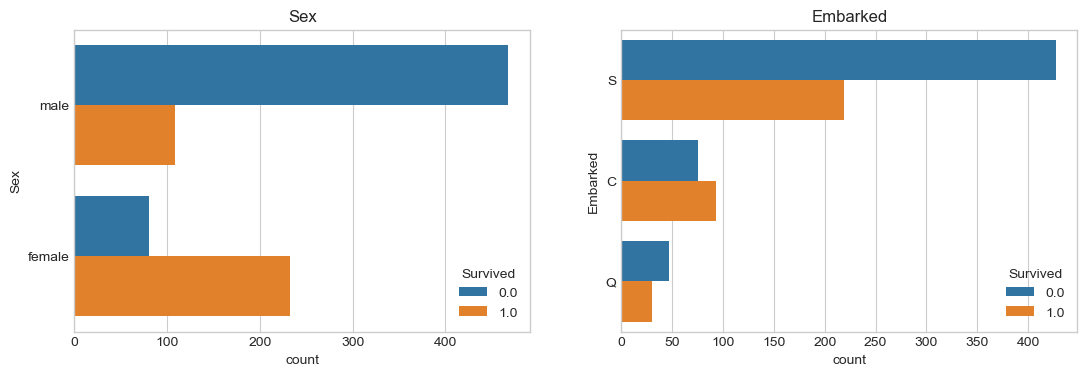

In [91]:
plot_bivariate_bar(df_con[['Sex', 'Embarked', 'Survived']], hue='Survived', height=4, wspace=0.2)

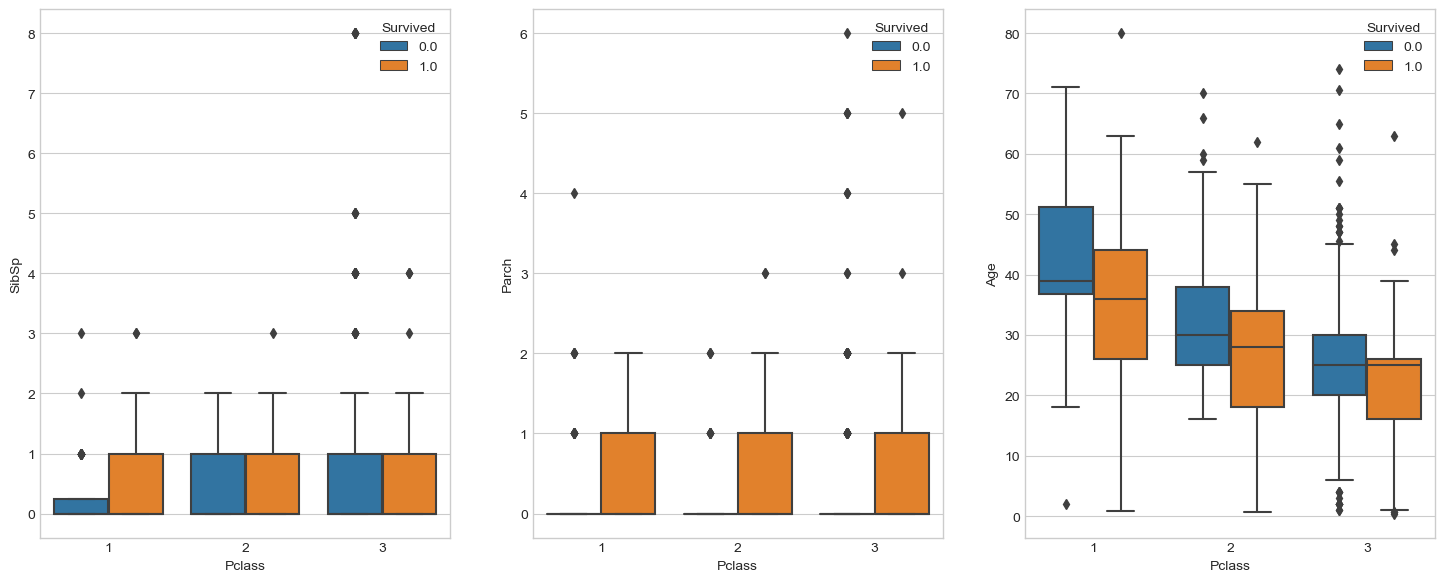

In [92]:
plt.figure(figsize=(18, 7), dpi=100) 
plt.subplot(1, 3, 1)
# Effect of Pclass and SibSp on Survived, across Pclass.
sns.boxplot(x='Pclass',y='SibSp',hue='Survived', data=df_con)

plt.subplot(1, 3, 2)
# Effect of Pclass and Parch on Survived, across Pclass.
sns.boxplot(x='Pclass',y='Parch',hue='Survived', data=df_con)

plt.subplot(1, 3, 3)
# Effect of Pclass and Age on Survived, across Pclass.
sns.boxplot(x='Pclass',y='Age',hue='Survived', data=df_con);

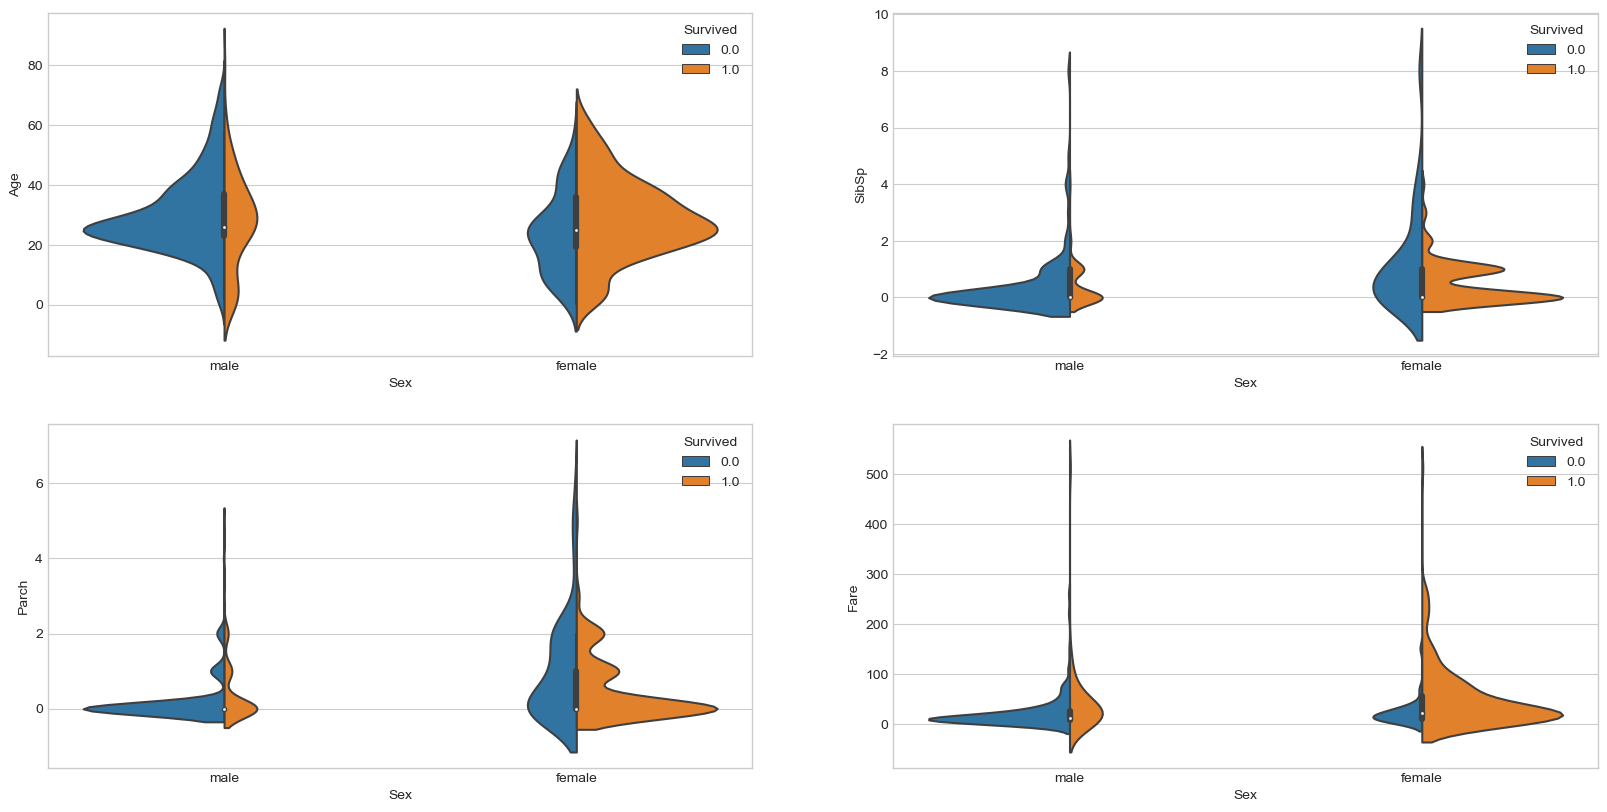

In [93]:
# Historical Trends on the Sex, Age, SibSp, Parch and Fare impact on Survived.
plt.figure(figsize=(20,10), dpi=100) 
plt.subplot(2, 2, 1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 2)
sns.violinplot(x='Sex', y='SibSp', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 3)
sns.violinplot(x='Sex', y='Parch', hue='Survived', data=df_con, split=True, scale='count');

plt.subplot(2, 2, 4)
sns.violinplot(x='Sex', y='Fare', hue='Survived', data=df_con, split=True, scale='count');

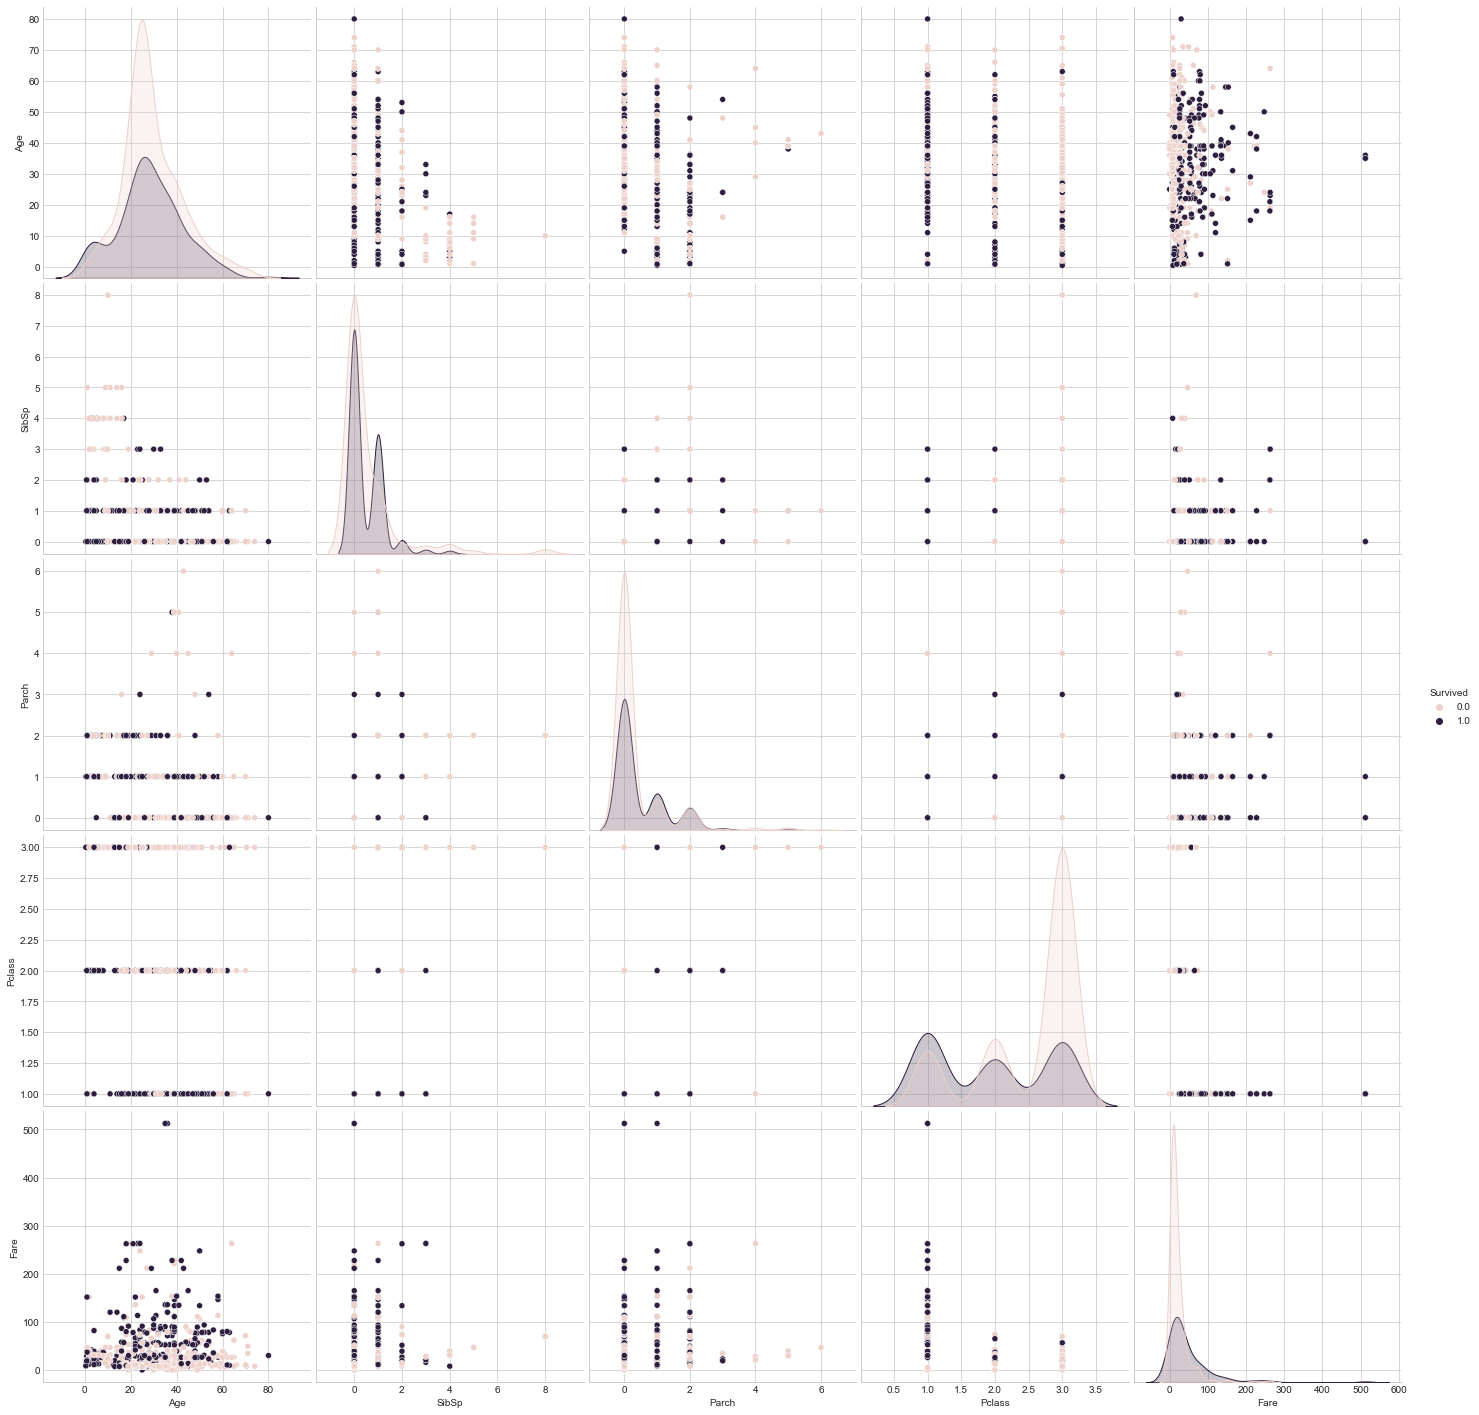

In [94]:
# Interaction between pairs of features.
sns.pairplot(df_con[['Survived', 'Age','SibSp','Parch','Pclass','Fare']], 
             hue="Survived", 
             diag_kind="kde",
             size=4);

## Feature Engineering

### Title

Feature Name is unique to each passenger. However the title in the name might be useful information

In [95]:
df['Name'].value_counts()

Connolly, Miss. Kate                      2
Kelly, Mr. James                          2
Taussig, Miss. Ruth                       1
Rintamaki, Mr. Matti                      1
Kvillner, Mr. Johan Henrik Johannesson    1
                                         ..
de Brito, Mr. Jose Joaquim                1
Doyle, Miss. Elizabeth                    1
Newell, Miss. Madeleine                   1
Peter, Master. Michael J                  1
Garside, Miss. Ethel                      1
Name: Name, Length: 1307, dtype: int64

In [96]:
def get_title(s):
    return s.split(',')[1].split('.')[0].strip()

In [97]:
df['Title'] = df['Name'].apply(get_title)

In [98]:
df['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Mme               1
Jonkheer          1
the Countess      1
Lady              1
Sir               1
Capt              1
Don               1
Dona              1
Name: Title, dtype: int64

We deciced to group the title since some title are extremely rare

In [99]:
# Rare cases
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Mlle', 'Major', 'Dona', 'Lady', 'the Countess', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Mme'],
                                  'Rare')
# Women
df['Title'] = df['Title'].replace(['Miss', 'Mrs', 'Ms'], 'Women')

In [100]:
df['Title'].value_counts()

Mr        757
Women     459
Master     61
Rare       32
Name: Title, dtype: int64

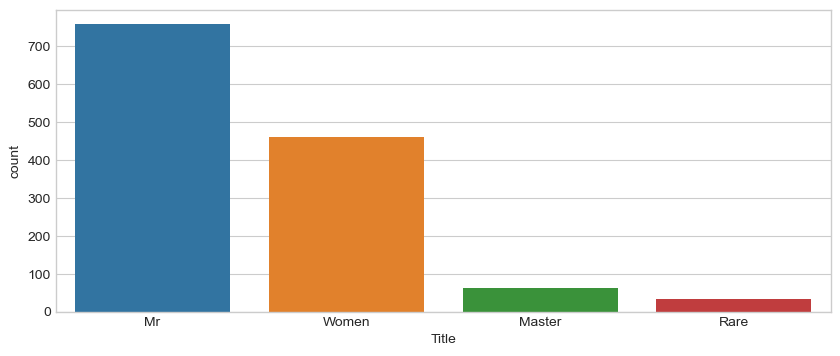

In [101]:
plt.figure(figsize=(10, 4), dpi=100)
sns.countplot(x='Title', data=df);

In [120]:
df_bin['Title'] = df['Title']
df_con['Title'] = df['Title']

### Familiy Size

Since feature SibSp and Parch are the number of member in the family, We could combine them to find the family size

In [121]:
# siblings + parents + the passenger
df['Family_size'] = df['SibSp'] + df['Parch'] + 1

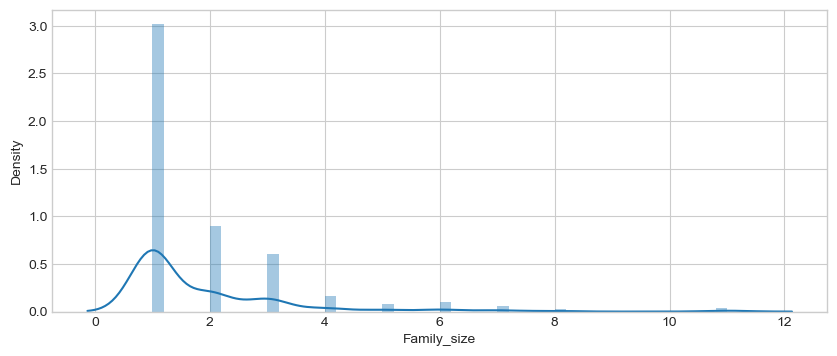

In [122]:
plt.figure(figsize=(10, 4), dpi=100)
sns.distplot(df['Family_size']);

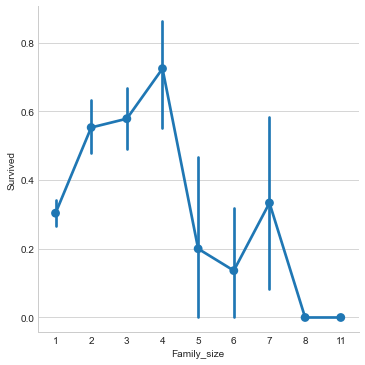

In [123]:
sns.factorplot(x='Family_size', y='Survived', data=df);

In [124]:
df[['Family_size']].corrwith(df['Survived'])

Family_size    0.016639
dtype: float64

In [125]:
df_bin['Family_size'] = pd.cut(df['Family_size'], [0, 1, 3, 5,8], labels=['alone', 'small', 'medium', 'large'])
df_con['Family_size'] = df['Family_size']

## Feature Encoding

One Hot Encoding

In [126]:
bin_cols = df_bin.columns.to_list()
bin_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=bin_cols)

In [127]:
df_bin_enc.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_Q,Embarked_S,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large,Title_Master,Title_Mr,Title_Rare,Title_Women
0,0.0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1.0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,1.0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [128]:
df_bin_enc.shape

(1309, 47)

In [129]:
df_con_non_numeric_enc = pd.get_dummies(df_con[['Title', 'Embarked', 'Sex']])
df_con_pclass_enc = pd.get_dummies(df_con['Pclass'], prefix='Pclass')

df_con_enc = pd.concat([df_con,df_con_non_numeric_enc, df_con_pclass_enc], axis=1)
df_con_enc.drop(['Pclass', 'Sex', 'Embarked', 'Title'], axis=1, inplace=True)

In [130]:
df_con_enc.head()

,Survived,SibSp,Parch,Fare,Age,Family_size,Title_Master,Title_Mr,Title_Rare,Title_Women,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,0,7.2500,22.0,2,0,1,0,0,0,0,1,0,1,0,0,1
1,1.0,1,0,71.2833,38.0,2,0,0,0,1,1,0,0,1,0,1,0,0
2,1.0,0,0,7.9250,26.0,1,0,0,0,1,0,0,1,1,0,0,0,1
3,1.0,1,0,53.1000,35.0,2,0,0,0,1,0,0,1,1,0,1,0,0
4,0.0,0,0,8.0500,35.0,1,0,1,0,0,0,0,1,0,1,0,0,1


In [131]:
df_con_enc.shape

(1309, 18)

## Feature Correlation

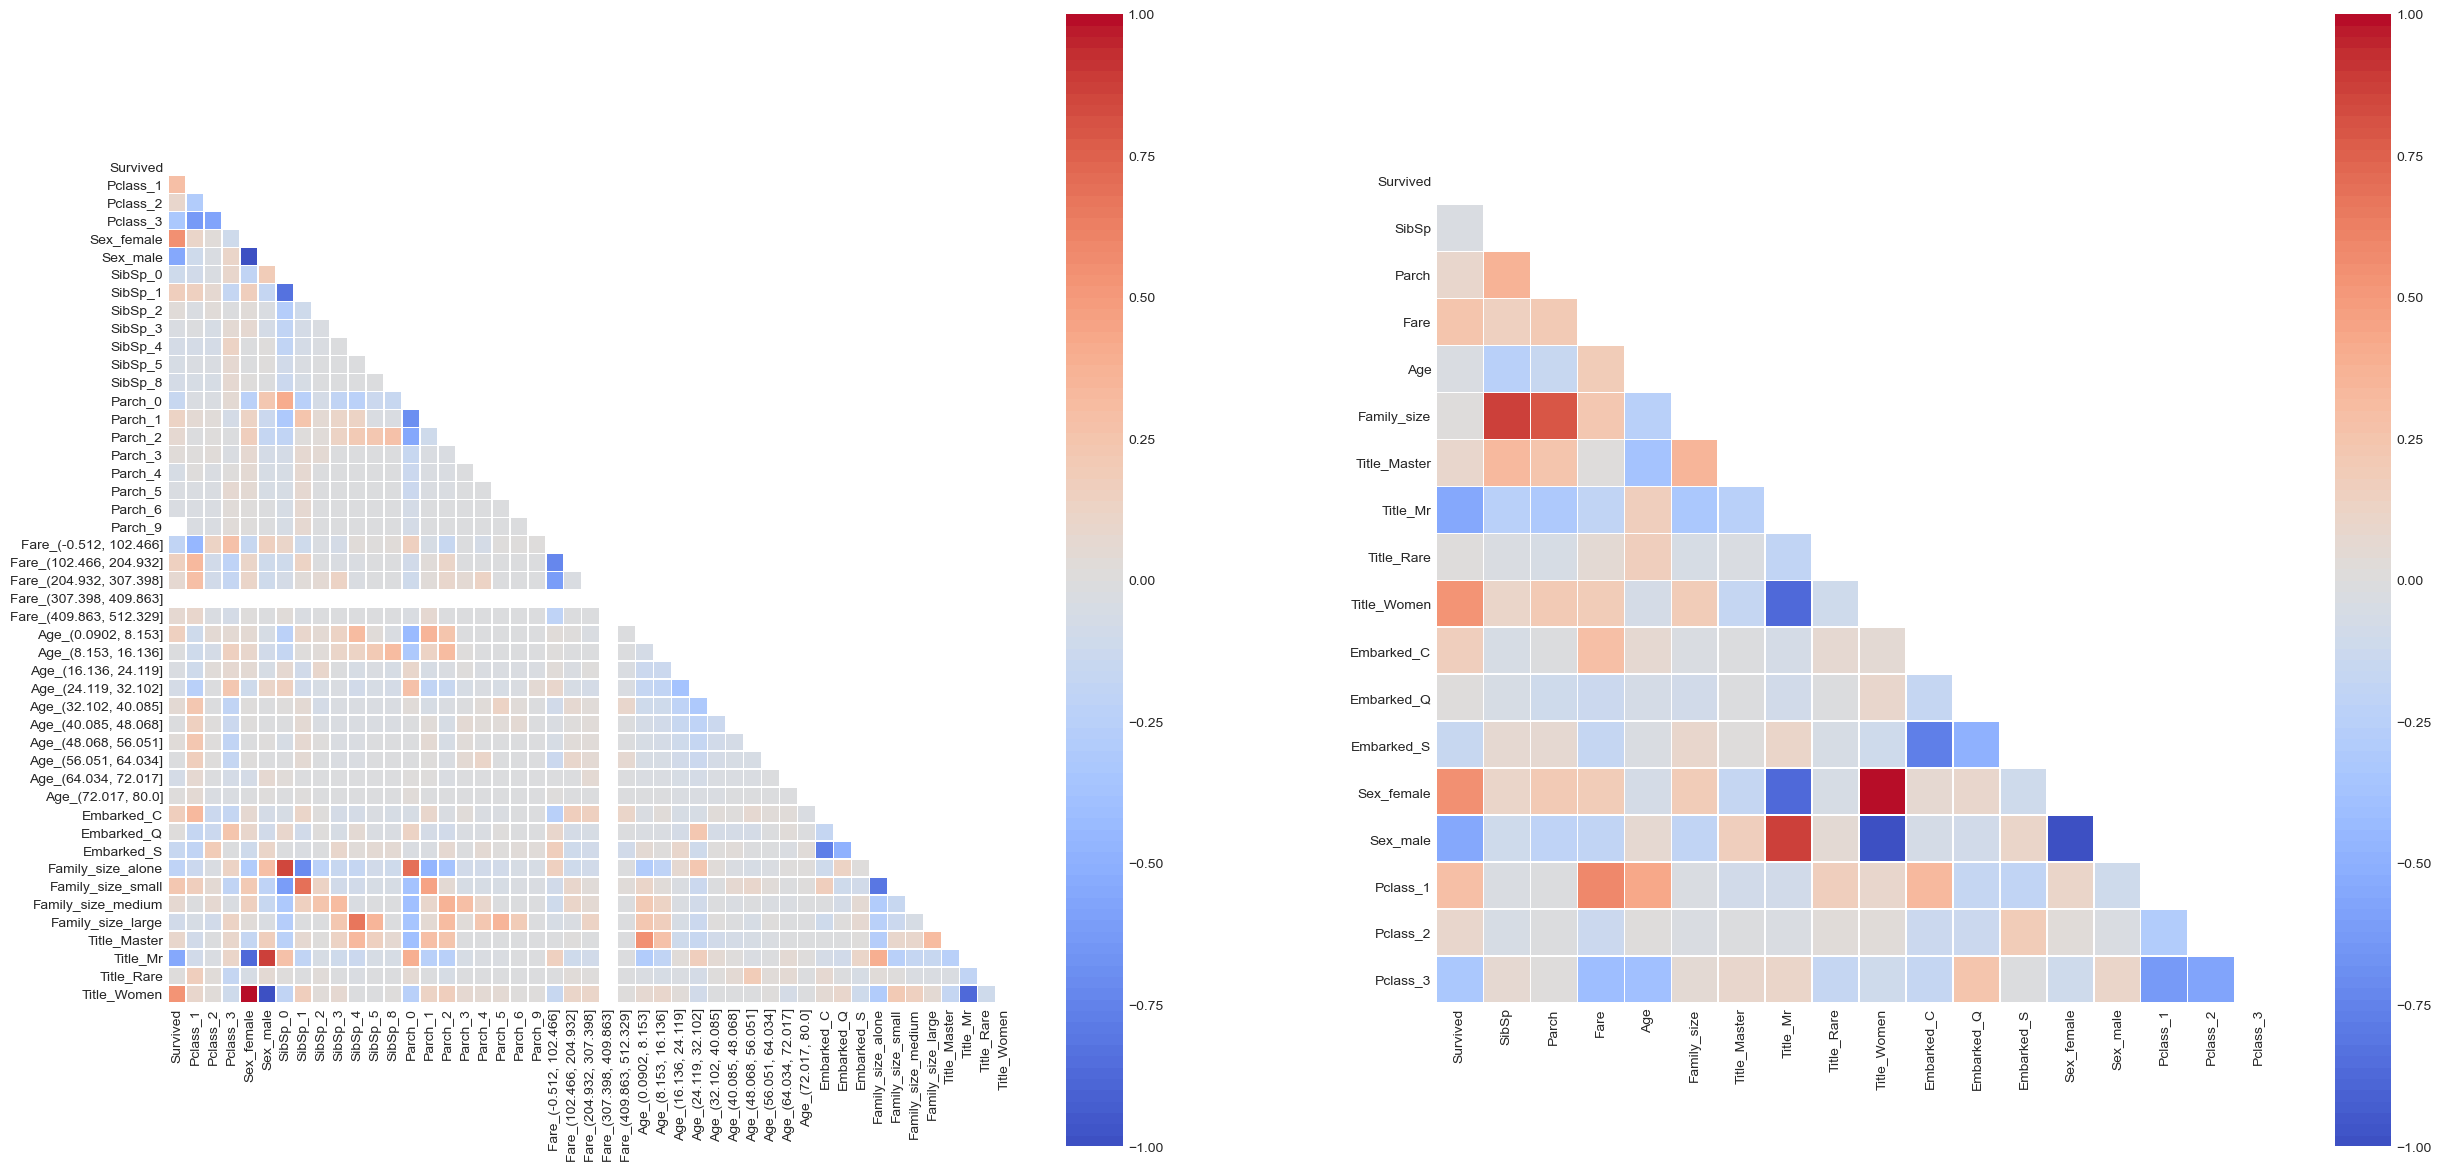

In [132]:
plt.figure(figsize=(30, 15), dpi=100) 

plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(df_bin_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_bin_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("coolwarm", 100), 
            mask=mask, 
            linewidths=0.2)

plt.subplot(1, 2, 2)
mask = np.zeros_like(df_con_enc.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_con_enc.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("coolwarm", 100), 
            mask=mask,
            linewidths=0.2);

## Selecting Dataset

We will go through the machine learning process in each dataset

In [258]:
# OPTIONS: 
# - df_bin_enc
# - df_con_enc

# Change the dataset to see how would the algorithms perform under a differently dataset.

selected_df = df_bin_enc
# selected_df = df_con_enc

In [259]:
selected_df.head()

,Survived,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,...,Embarked_Q,Embarked_S,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large,Title_Master,Title_Mr,Title_Rare,Title_Women
0,0.0,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1.0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.0,0,0,1,1,0,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,1.0,1,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.0,0,0,1,0,1,1,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [260]:
train = selected_df.iloc[:len(train)]
test = selected_df.iloc[len(train):]

In [261]:
# Split the dataframe into data and labels
X_train = train.drop('Survived', axis=1) 
y_train = train['Survived']

In [262]:
X_train.shape

(891, 46)

In [263]:
X_train.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Embarked_Q,Embarked_S,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large,Title_Master,Title_Mr,Title_Rare,Title_Women
0,0,0,1,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,1,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,1,0,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0,0,1,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,1,0,0


In [264]:
y_train.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64

## Machine Learning Algorithm

We will be running the following algorithms.

+ Logistic Regression
+ Naive Bayes
+ Stochastic Gradient Decent
+ K-Nearest Neightbours
+ Decision Tree
+ Random Forest
+ Linear SVC
+ Gradient Boosted Trees

In [265]:
# Run the model and return the accuracy metrics
def fit_ml_model(ml_algo, X_train, y_train, cv):
    # Single run
    model = ml_algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    if (not isinstance(ml_algo, (SGDClassifier, LinearSVC))):
        probs = model.predict_proba(X_train)[:,1]
    else:
        probs = "Not Available"
    # CV 
    train_pred = model_selection.cross_val_predict(ml_algo, 
                                   X_train, 
                                   y_train, 
                                   cv=cv, 
                                   n_jobs=-1)
    acc_cv = round(accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, acc, acc_cv, probs

In [266]:
def plot_roc_curve(y_test, probs):
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 4), dpi=100)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate');

### Logistic Regression

In [267]:
start_time = time.time()
train_pred_log, acc_log, acc_cv_log, prob_log = fit_ml_model(LogisticRegression(random_state=42, n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.61
Accuracy CV 10-Fold: 82.15
Running Time: 0:00:00.138673


In [268]:
print(classification_report(y_train, train_pred_log, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.87      0.86       549
    Survived       0.78      0.74      0.76       342

    accuracy                           0.82       891
   macro avg       0.81      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



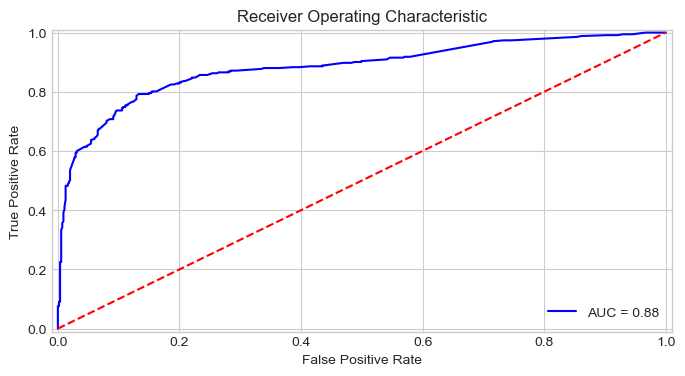

In [269]:
plot_roc_curve(y_train, prob_log)

### Naive Bayes

In [270]:
start_time = time.time()
train_pred_gnb, acc_gnb, acc_cv_gnb, prob_gnb = fit_ml_model(GaussianNB(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
gnb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gnb)
print("Accuracy CV 10-Fold: %s" % acc_cv_gnb)
print("Running Time: %s" % datetime.timedelta(seconds=gnb_time))

Accuracy: 42.99
Accuracy CV 10-Fold: 42.09
Running Time: 0:00:00.054844


In [271]:
print(classification_report(y_train, train_pred_gnb, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.87      0.07      0.13       549
    Survived       0.40      0.98      0.57       342

    accuracy                           0.42       891
   macro avg       0.63      0.53      0.35       891
weighted avg       0.69      0.42      0.30       891



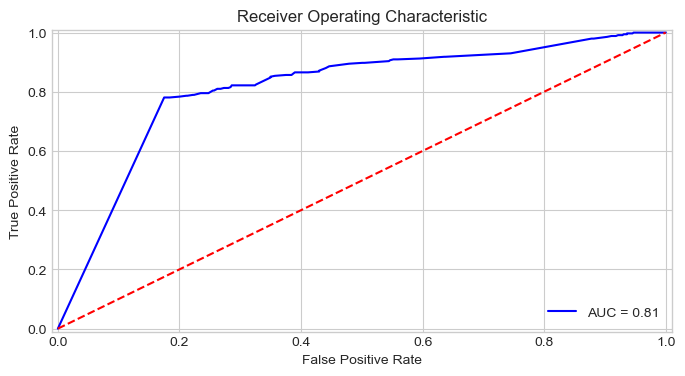

In [272]:
plot_roc_curve(y_train, prob_gnb)

### Stochastic Gradient Decent

In [273]:
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_model(SGDClassifier(n_jobs=-1, random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 61.84
Accuracy CV 10-Fold: 78.56
Running Time: 0:00:00.099071


In [274]:
print(classification_report(y_train, train_pred_sgd, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.81      0.82       549
    Survived       0.71      0.74      0.73       342

    accuracy                           0.79       891
   macro avg       0.77      0.78      0.78       891
weighted avg       0.79      0.79      0.79       891



### K-Nearest Neightbours

In [275]:
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn, prob_knn = fit_ml_model(KNeighborsClassifier(n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 83.84
Accuracy CV 10-Fold: 81.37
Running Time: 0:00:00.130467


In [276]:
print(classification_report(y_train, train_pred_knn, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.88      0.85       549
    Survived       0.79      0.71      0.74       342

    accuracy                           0.81       891
   macro avg       0.81      0.79      0.80       891
weighted avg       0.81      0.81      0.81       891



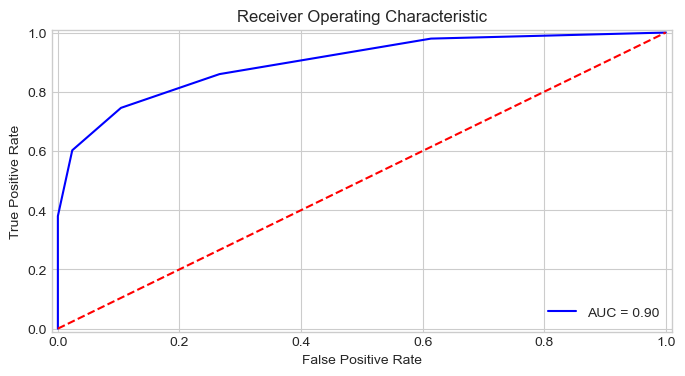

In [277]:
plot_roc_curve(y_train, prob_knn)

### Decision Tree

In [278]:
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt, prob_dt = fit_ml_model(DecisionTreeClassifier(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 88.44
Accuracy CV 10-Fold: 79.8
Running Time: 0:00:00.067067


In [279]:
print(classification_report(y_train, train_pred_dt, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.80      0.90      0.85       549
    Survived       0.80      0.63      0.71       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.79       891



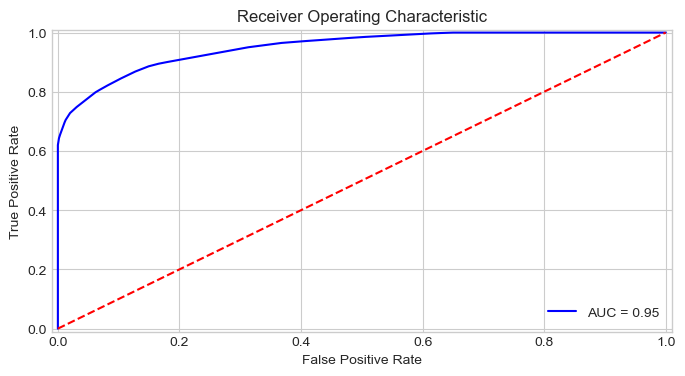

In [280]:
plot_roc_curve(y_train, prob_dt)

### Random Forest

In [281]:
start_time = time.time()
train_pred_rf, acc_rf, acc_cv_rf, prob_rf = fit_ml_model(RandomForestClassifier(random_state=42, n_jobs=-1), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 88.44
Accuracy CV 10-Fold: 80.02
Running Time: 0:00:00.715825


In [282]:
print(classification_report(y_train, train_pred_rf, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.81      0.89      0.85       549
    Survived       0.79      0.65      0.72       342

    accuracy                           0.80       891
   macro avg       0.80      0.77      0.78       891
weighted avg       0.80      0.80      0.80       891



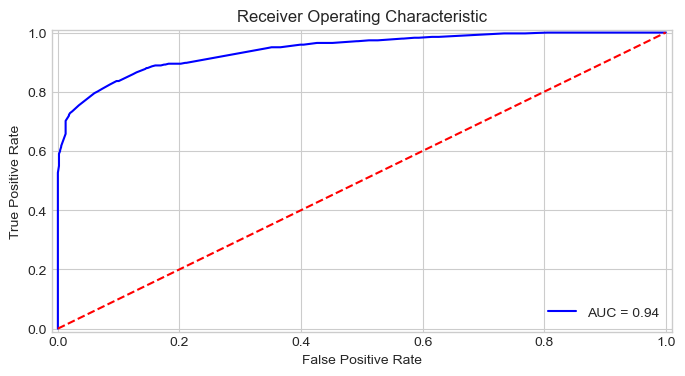

In [283]:
plot_roc_curve(y_train, prob_rf)

### Linear SVC

In [284]:
start_time = time.time()
train_pred_svc, acc_svc, acc_cv_svc, _ = fit_ml_model(LinearSVC(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_svc)
print("Running Time: %s" % datetime.timedelta(seconds=svc_time))

Accuracy: 83.16
Accuracy CV 10-Fold: 82.49
Running Time: 0:00:00.103205


In [285]:
print(classification_report(y_train, train_pred_svc, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.84      0.88      0.86       549
    Survived       0.80      0.73      0.76       342

    accuracy                           0.82       891
   macro avg       0.82      0.81      0.81       891
weighted avg       0.82      0.82      0.82       891



### Gradient Boosted Trees

In [286]:
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt, prob_gbt = fit_ml_model(GradientBoostingClassifier(random_state=42), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 86.31
Accuracy CV 10-Fold: 81.71
Running Time: 0:00:00.337504


In [287]:
print(classification_report(y_train, train_pred_gbt, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.89      0.86       549
    Survived       0.80      0.70      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.81       891



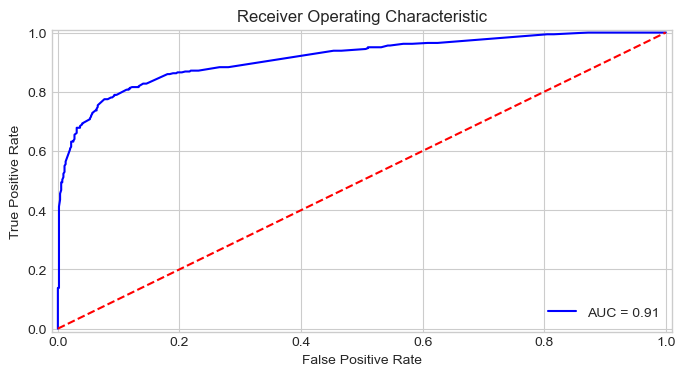

In [288]:
plot_roc_curve(y_train, prob_gbt)

## Ranking Results

We will go though all the processes with df_bin_enc and df_con_enc

### df_con_enc

Single run

In [253]:
# df_con_enc_single = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Naive Bayes', 
#               'Stochastic Gradient Decent', 'K-Nearest Neightbours',
#               'Decision Tree', 'Random Forest', 
#               'Linear SVC', 'Gradient Boosting Trees'],
#     'Score': [ 
#         acc_log, 
#         acc_gnb, 
#         acc_sgd, 
#         acc_knn,
#         acc_dt,
#         acc_rf, 
#         acc_svc, 
#         acc_gbt
#     ]})

# df_con_enc_single.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.32
5,Random Forest,98.32
7,Gradient Boosting Trees,91.02
0,Logistic Regression,83.39
3,K-Nearest Neightbours,81.59
1,Naive Bayes,81.37
6,Linear SVC,77.44
2,Stochastic Gradient Decent,73.40


### df_bin_enc

Single run

In [289]:
df_bin_enc_single = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'K-Nearest Neightbours',
              'Decision Tree', 'Random Forest', 
              'Linear SVC', 'Gradient Boosting Trees'],
    'Score': [ 
        acc_log, 
        acc_gnb, 
        acc_sgd, 
        acc_knn,
        acc_dt,
        acc_rf, 
        acc_svc, 
        acc_gbt
    ]})

df_bin_enc_single.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,88.44
5,Random Forest,88.44
7,Gradient Boosting Trees,86.31
3,K-Nearest Neightbours,83.84
0,Logistic Regression,83.61
6,Linear SVC,83.16
2,Stochastic Gradient Decent,61.84
1,Naive Bayes,42.99


### df_con_enc

CV 10-folds

In [254]:
# df_con_enc_cv = pd.DataFrame({
#     'Model': ['Logistic Regression', 'Naive Bayes', 
#               'Stochastic Gradient Decent', 'K-Nearest Neightbours',
#               'Decision Tree', 'Random Forest', 
#               'Linear SVC', 'Gradient Boosting Trees'],
#     'Score': [ 
#         acc_cv_log, 
#         acc_cv_gnb, 
#         acc_cv_sgd, 
#         acc_cv_knn,
#         acc_cv_dt,
#         acc_cv_rf, 
#         acc_cv_svc, 
#         acc_cv_gbt
#     ]})

# df_con_enc_cv.sort_values(by='Score', ascending=False)

,Model,Score
7,Gradient Boosting Trees,83.28
0,Logistic Regression,82.72
5,Random Forest,80.70
1,Naive Bayes,79.80
4,Decision Tree,79.46
2,Stochastic Gradient Decent,76.77
3,K-Nearest Neightbours,74.07
6,Linear SVC,73.74


### df_bin_enc

CV 10-folds

In [290]:
df_bin_enc_cv = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'K-Nearest Neightbours',
              'Decision Tree', 'Random Forest', 
              'Linear SVC', 'Gradient Boosting Trees'],
    'Score': [ 
        acc_cv_log, 
        acc_cv_gnb, 
        acc_cv_sgd, 
        acc_cv_knn,
        acc_cv_dt,
        acc_cv_rf, 
        acc_cv_svc, 
        acc_cv_gbt
    ]})

df_bin_enc_cv.sort_values(by='Score', ascending=False)

,Model,Score
6,Linear SVC,82.49
0,Logistic Regression,82.15
7,Gradient Boosting Trees,81.71
3,K-Nearest Neightbours,81.37
5,Random Forest,80.02
4,Decision Tree,79.80
2,Stochastic Gradient Decent,78.56
1,Naive Bayes,42.09


In [291]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = roc_curve(y_test, prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')

In [292]:
models = [
    'Logistic Regression',
    'Naive Bayes',
    'K-Nearest Neightbours',
    'Decision Tree',
    'Random Forest',  
    'Gradient Boosting Trees'
]
probs = [
    prob_log,
    prob_gnb,
    prob_knn,
    prob_dt,
    prob_rf,
    prob_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
]

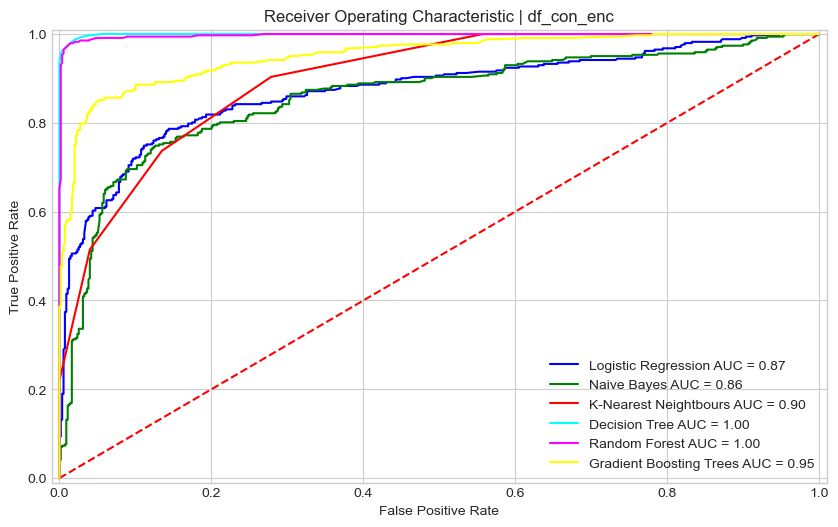

In [257]:
# plt.figure(figsize=(10, 6), dpi=100) 

# plt.title('Receiver Operating Characteristic | df_con_enc')
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([-0.01, 1.01])
# plt.ylim([-0.01, 1.01])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

# for i, model in list(enumerate(models)):
#     plot_roc_curves(y_train, probs[i], models[i])

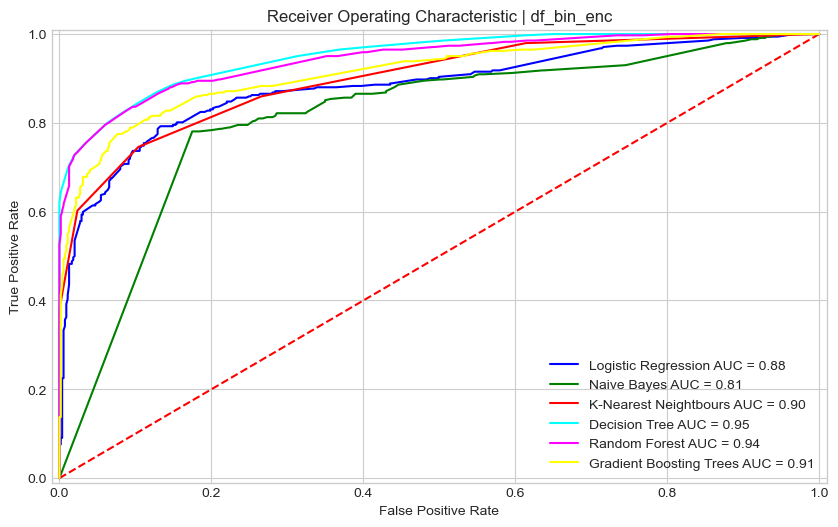

In [293]:
plt.figure(figsize=(10, 6), dpi=100) 

plt.title('Receiver Operating Characteristic | df_bin_enc')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

for i, model in list(enumerate(models)):
    plot_roc_curves(y_train, probs[i], models[i])

## Hyperparamater tunning

We decided to choose the Gradient Boosting Trees based on accuracy and AUC score

In [294]:
from sklearn.model_selection import GridSearchCV

In [295]:
params = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [296]:
gbt_grid_cv = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=10, n_jobs=-1, verbose=1)

In [297]:
gbt_grid_cv.fit(X_train, y_train)

Fitting 10 folds for each of 84672 candidates, totalling 846720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 1000 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3000 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 5800 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 9400 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 13800 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 19000 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 25000 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 31800 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 39400 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 47800 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 57000 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 67000 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 77800 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 89400

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15,
                                           0.2],
                         'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'min_samples_split': array([0.1       , 0.13636364, 0.17272727, 0.20909091, 0.24545455,
       0.28181818, 0.31818182, 0.35454545, 0.39090909, 0.42727273,
       0.46363636, 0.5       ]),
                         'n_estimators': [10],
                         'subsample': [0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0]},
             verbose=1)

In [298]:
gbt_grid_cv.best_estimator_

GradientBoostingClassifier(max_depth=8, max_features='sqrt',
                           min_samples_leaf=0.1, min_samples_split=0.1,
                           n_estimators=10)

In [301]:
y_train_pred = gbt_grid_cv.best_estimator_.predict(X_train)

In [302]:
train_acc_score = accuracy_score(y_train, y_train_pred)

In [303]:
train_acc_score

0.813692480359147

In [307]:
X_test = df_bin_enc[len(train):].drop('Survived', axis=1)

In [310]:
X_test.head(2)

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,...,Embarked_Q,Embarked_S,Family_size_alone,Family_size_small,Family_size_medium,Family_size_large,Title_Master,Title_Mr,Title_Rare,Title_Women
891,0,0,1,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
892,0,0,1,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [341]:
y_test_pred = gbt_grid_cv.best_estimator_.predict(X_test)

In [342]:
test_passengerId = df.iloc[len(train):]['PassengerId'].reset_index(drop=True)

In [343]:
test_Survived = pd.Series(y_test_pred, name="Survived").astype(int)

results = pd.concat([test_passengerId, test_Survived],axis=1)

results.to_csv("gbt_titanic.csv",index=False)

In [344]:
pd.read_csv('./gbt_titanic.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
